In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer

In [79]:
frames = []
for i in range(1,29):
    frames.append(pd.read_csv(f"load_data/Residential_{i}.csv"))

In [80]:
averaged_days = []
for df in frames:
    new_df = df.groupby(['date'], as_index=False).mean()
    new_df = new_df.drop(columns=['hour'])
    new_df.dropna(inplace=True)
    averaged_days.append(new_df)

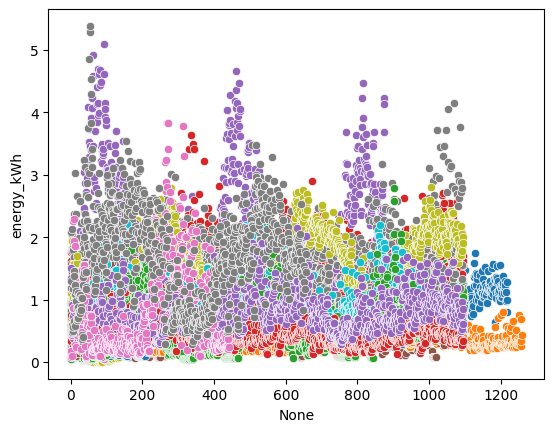

In [81]:
for df in averaged_days:
    #plt.figure()
    plot = sb.scatterplot(x=df.index, y=df['energy_kWh'])

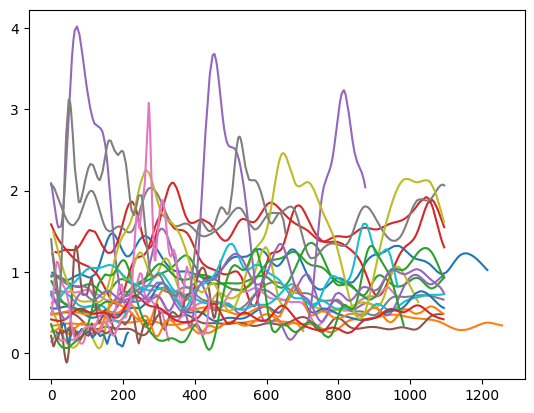

In [82]:
for df in averaged_days:
    train = df.sample(frac=0.7)
    test = df.drop(train.index)

    x_train = np.array(train.index)
    X_train = x_train[:, np.newaxis]
    y_train = train['energy_kWh'].to_numpy()

    x_test = np.array(test.index)
    X_test = x_test[:, np.newaxis]
    y_test = test['energy_kWh'].to_numpy()

    transformer = SplineTransformer(degree=3, n_knots=30, extrapolation="periodic")
    model = make_pipeline(transformer, Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    x_plot = [i[0] for i in X_test]
    #plt.figure()
    plot = sb.lineplot(x=x_plot, y=y_pred)